# Intializing all the libraries

In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno
#configure

#import the necessary modelling algos.

#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

# Importing the CSV file

In [300]:
df = pd.read_csv(r'C:\Users\HP\Desktop\DataScience\DataSets\899162-Bike-Sharing_Regression_project\hour.csv')

In [4]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Setting Index as Instant since all the values in that column are sequentially ordered.

In [301]:
df=df.set_index('instant')

Here,the features  'month' , 'weekday' , 'yr' columns are taken from 'dteday'. All the required columns are already taken .So 'dteday' can be dropped.

In [302]:
df=df.drop('dteday',axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  casual      17379 non-null  int64  
 13  registered  17379 non-null  int64  
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11)
memory usage: 2.1 MB


-> There are 17379 rows and all the columns are of numerical datatypes ( int64 and float 64)
-> Here some are categorical columns , but they are labelled numerically , so it wouldn't be a problem during model creation.

In [8]:
df.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Here 'temp' , 'atemp' , 'windspeed' and 'hum' columns are already scaled using MinMaxScaler. The values are between 0 and 1. The sum of 'casual' and 'registered' columns is 'cnt' column. So, while building a model , if either one of them is predicted , two of them must be dropped.

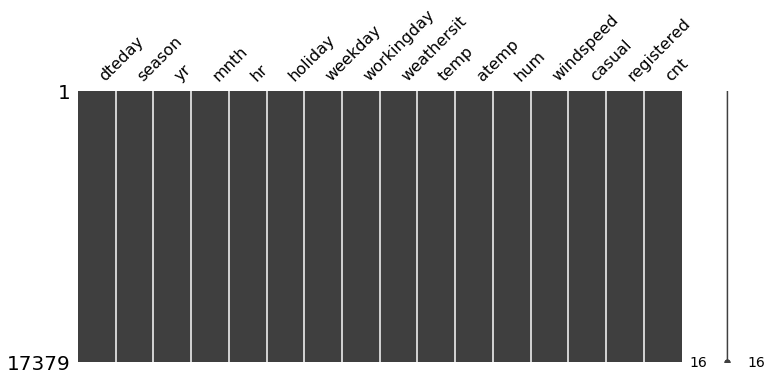

In [225]:
msno.matrix(df,figsize=(12,5))

There are no null values in any column

In [9]:
df.isna().sum()
#there are no null values in any column

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

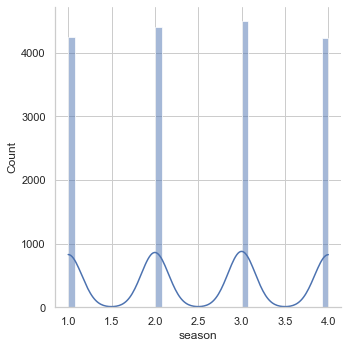

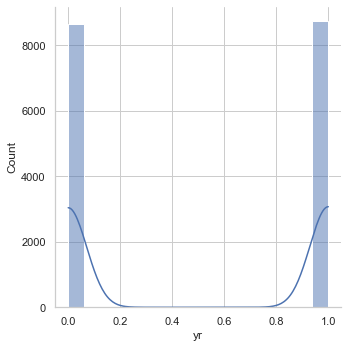

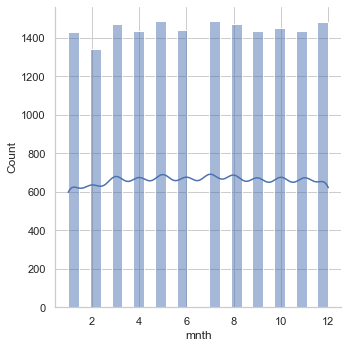

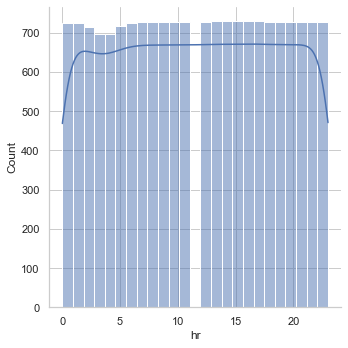

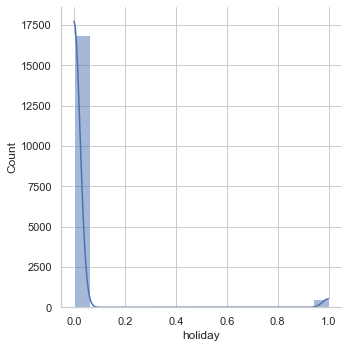

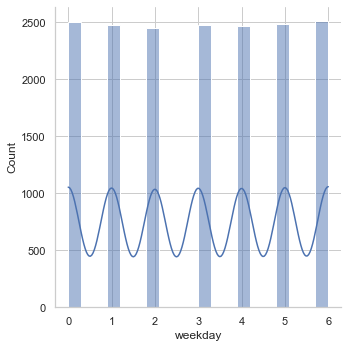

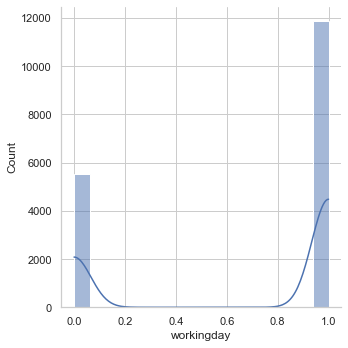

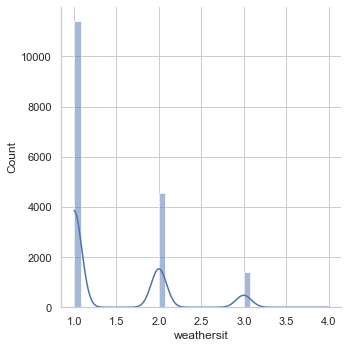

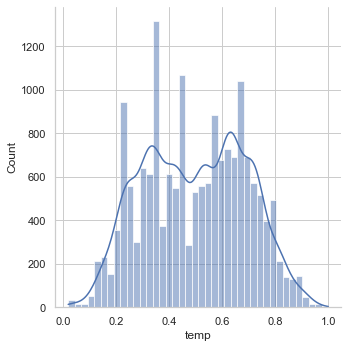

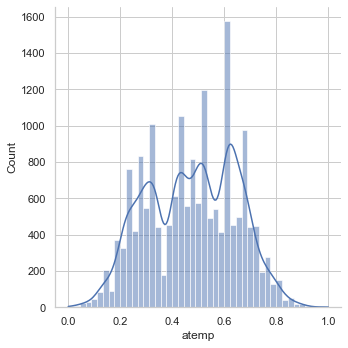

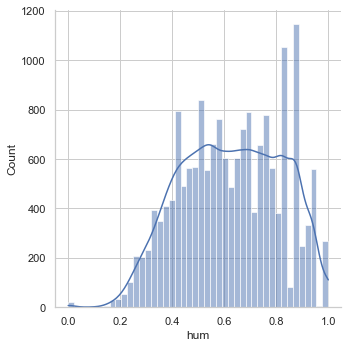

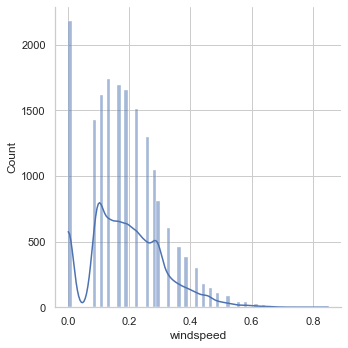

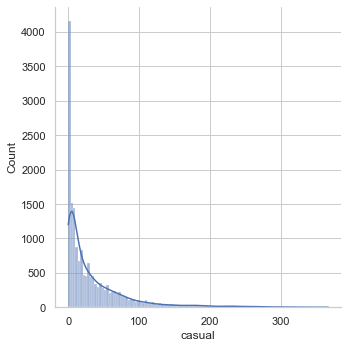

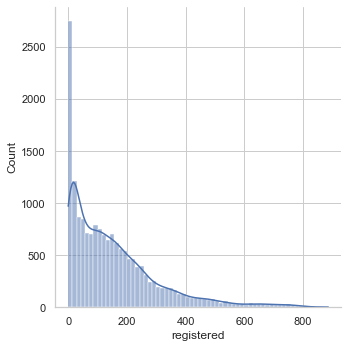

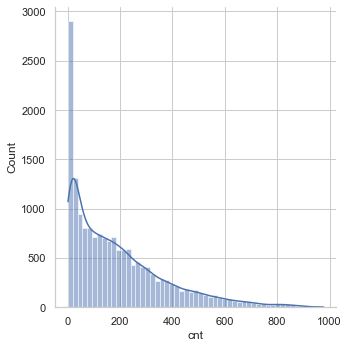

In [10]:
for i in df.columns:    
    sns.set_theme(style="whitegrid")
    ax=sns.displot(df, x=i, kde=True)

Histogram to depict distribuitions of all the columns.

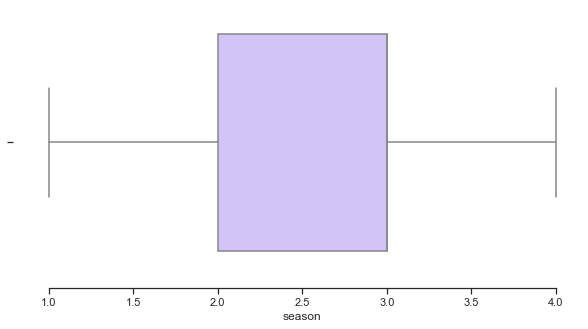

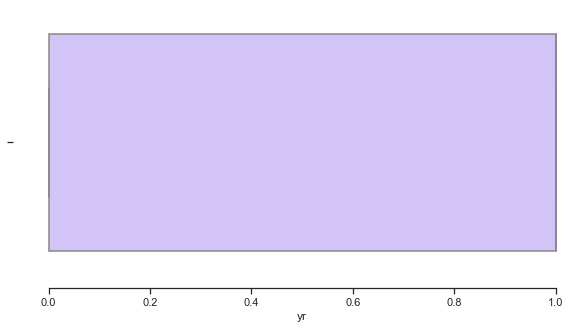

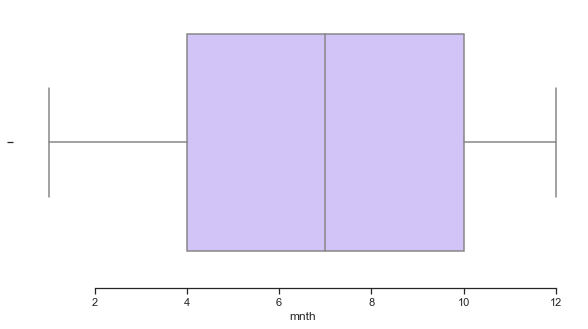

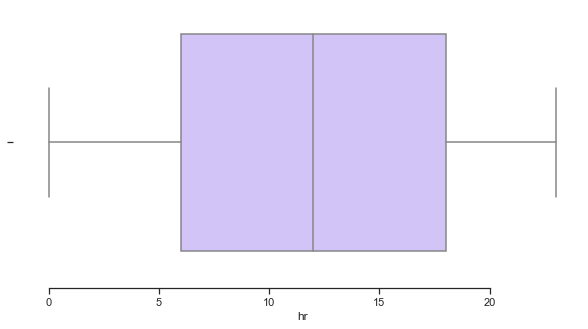

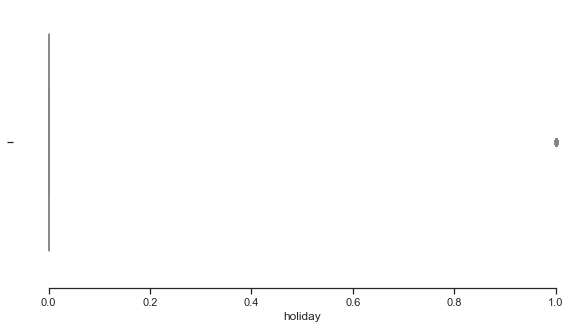

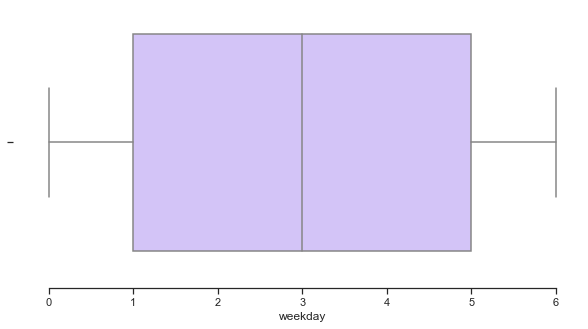

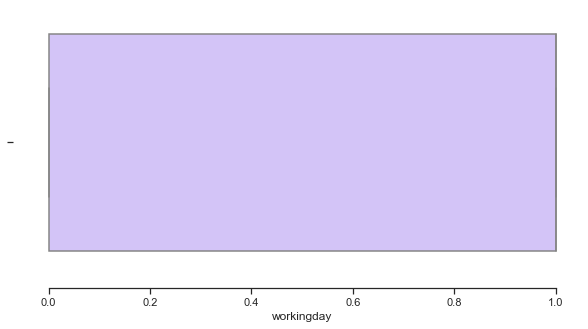

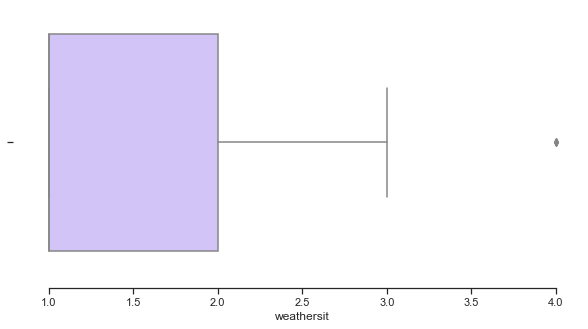

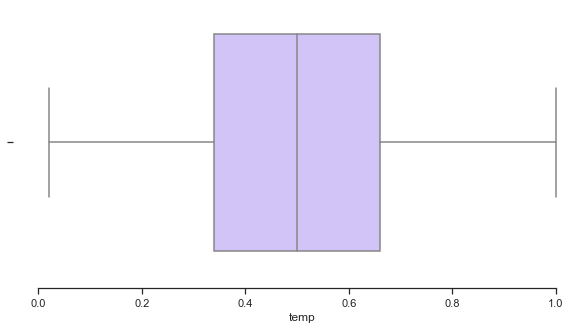

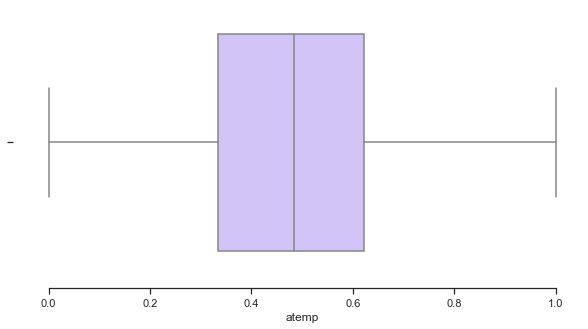

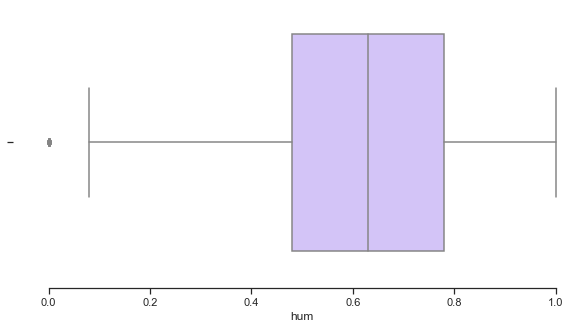

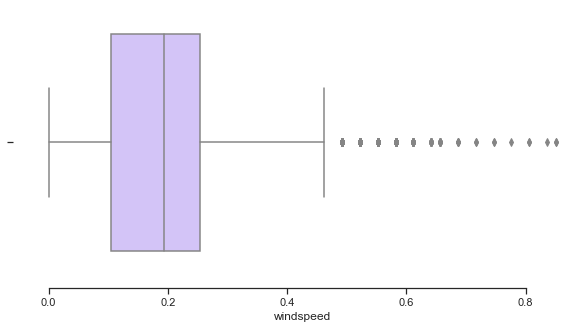

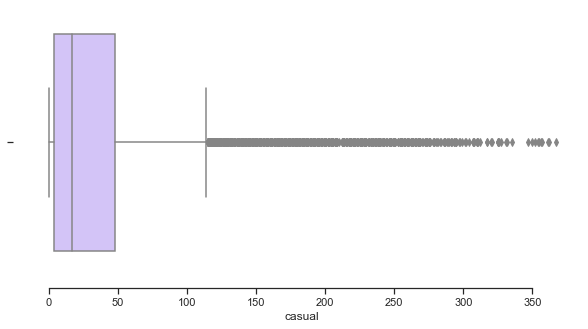

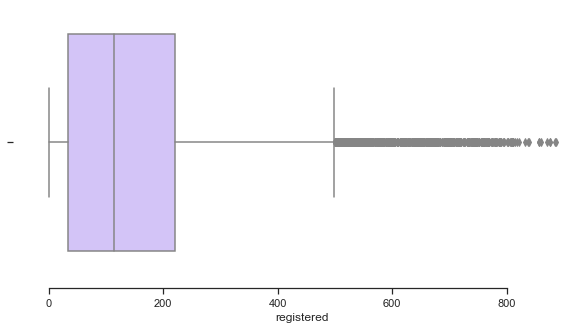

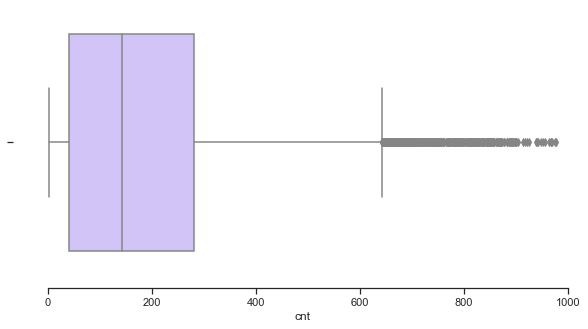

In [77]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

for i in df.columns:
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.boxplot(x=i,palette=["m", "g"],data=df)
    sns.despine(offset=10, trim=True)
    plt.show()

-> Boxplot to depict potential outliers in the dataset for various columns to find out anomalies.

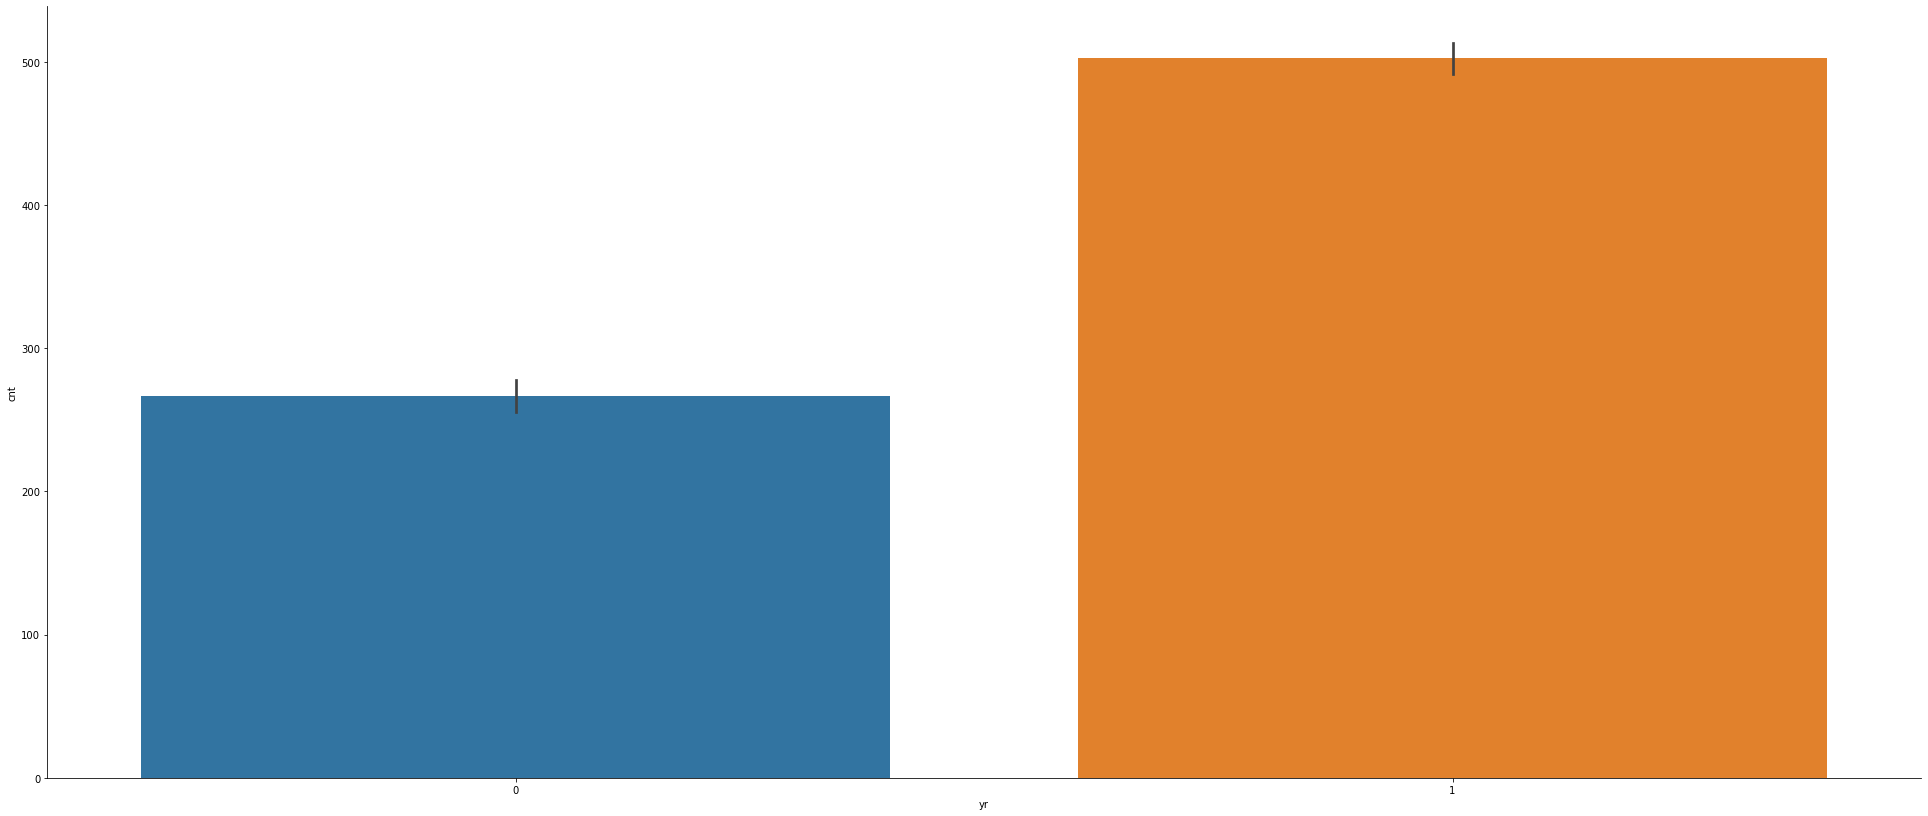

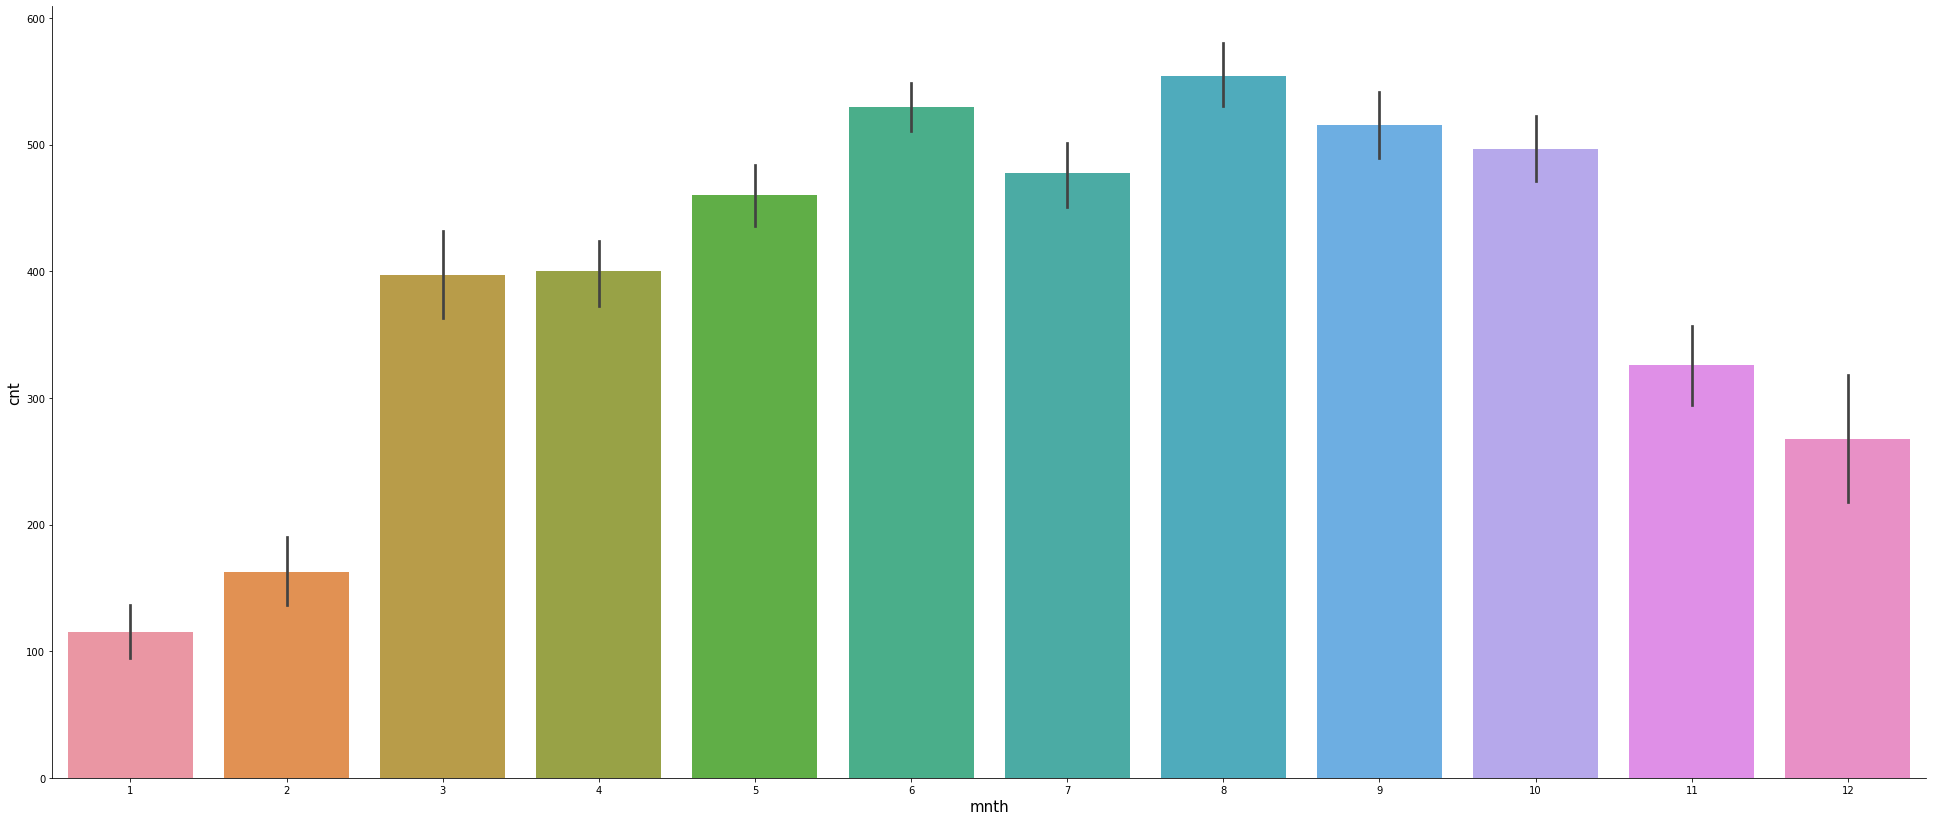

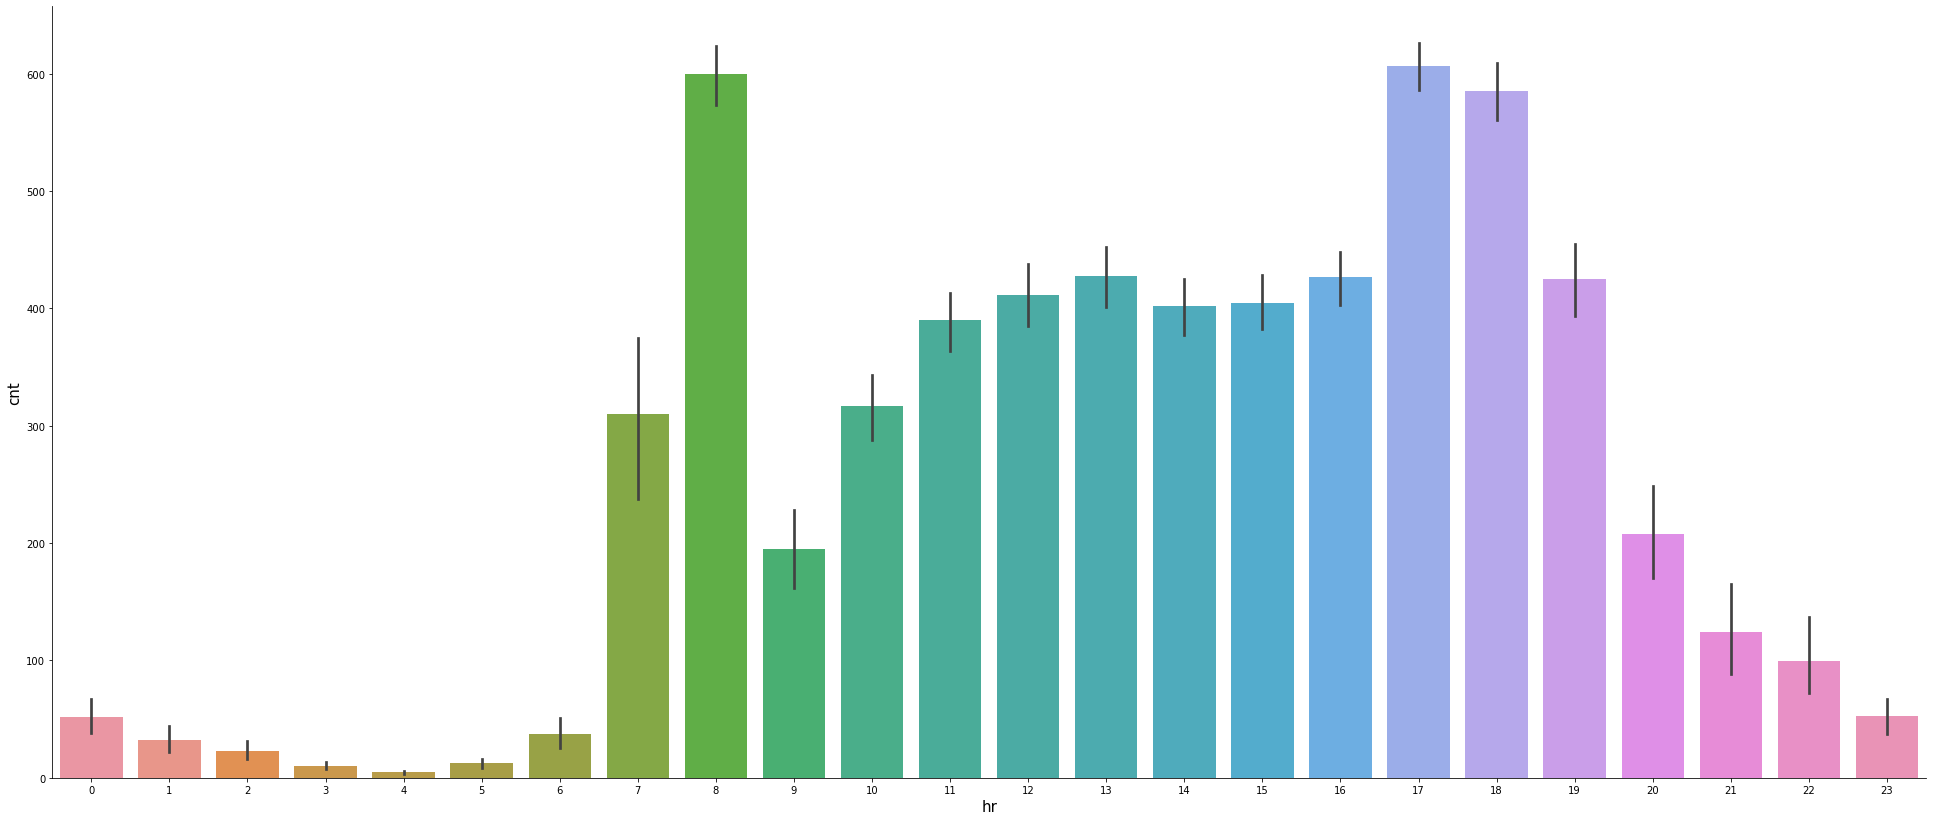

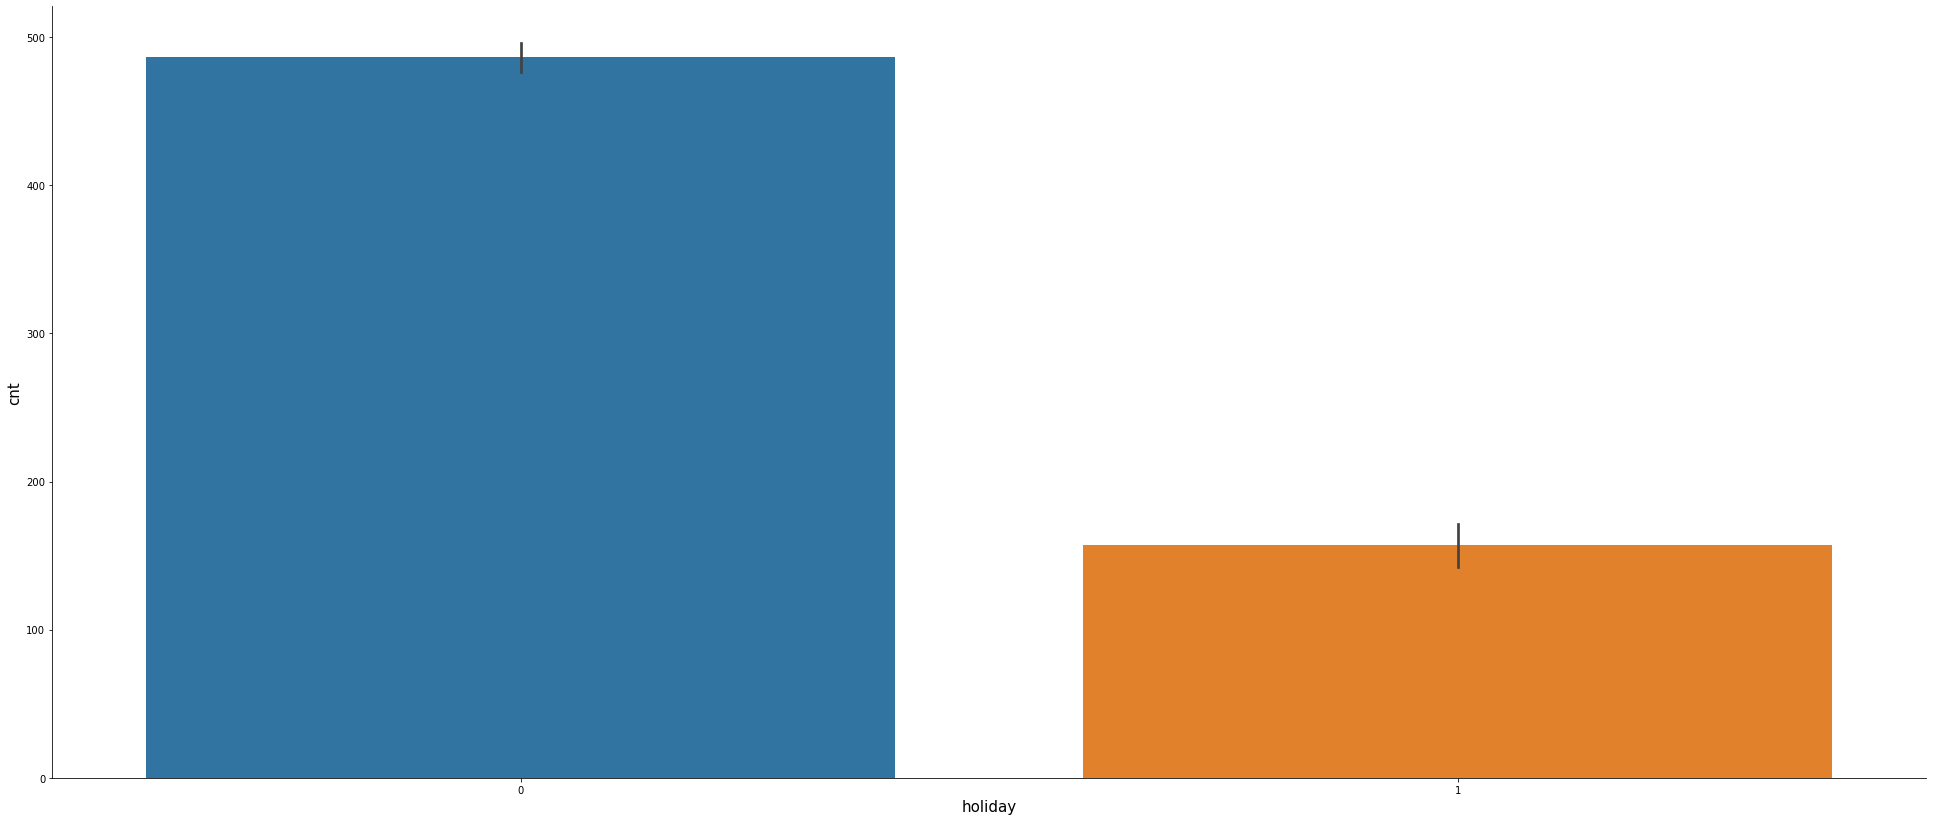

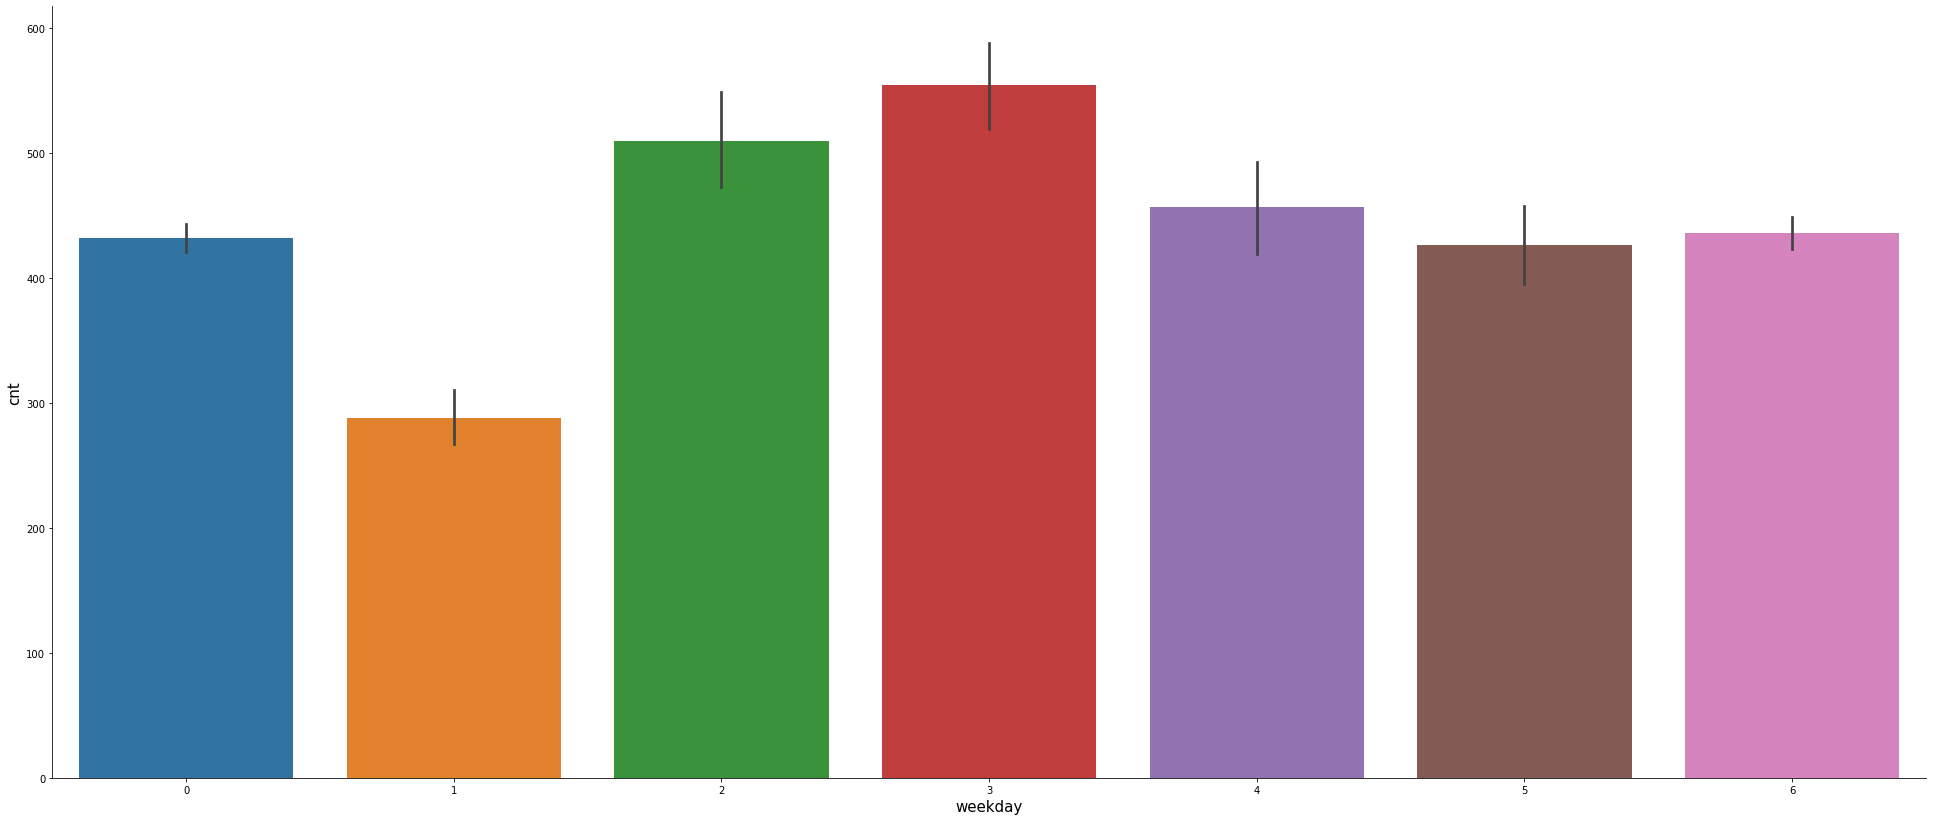

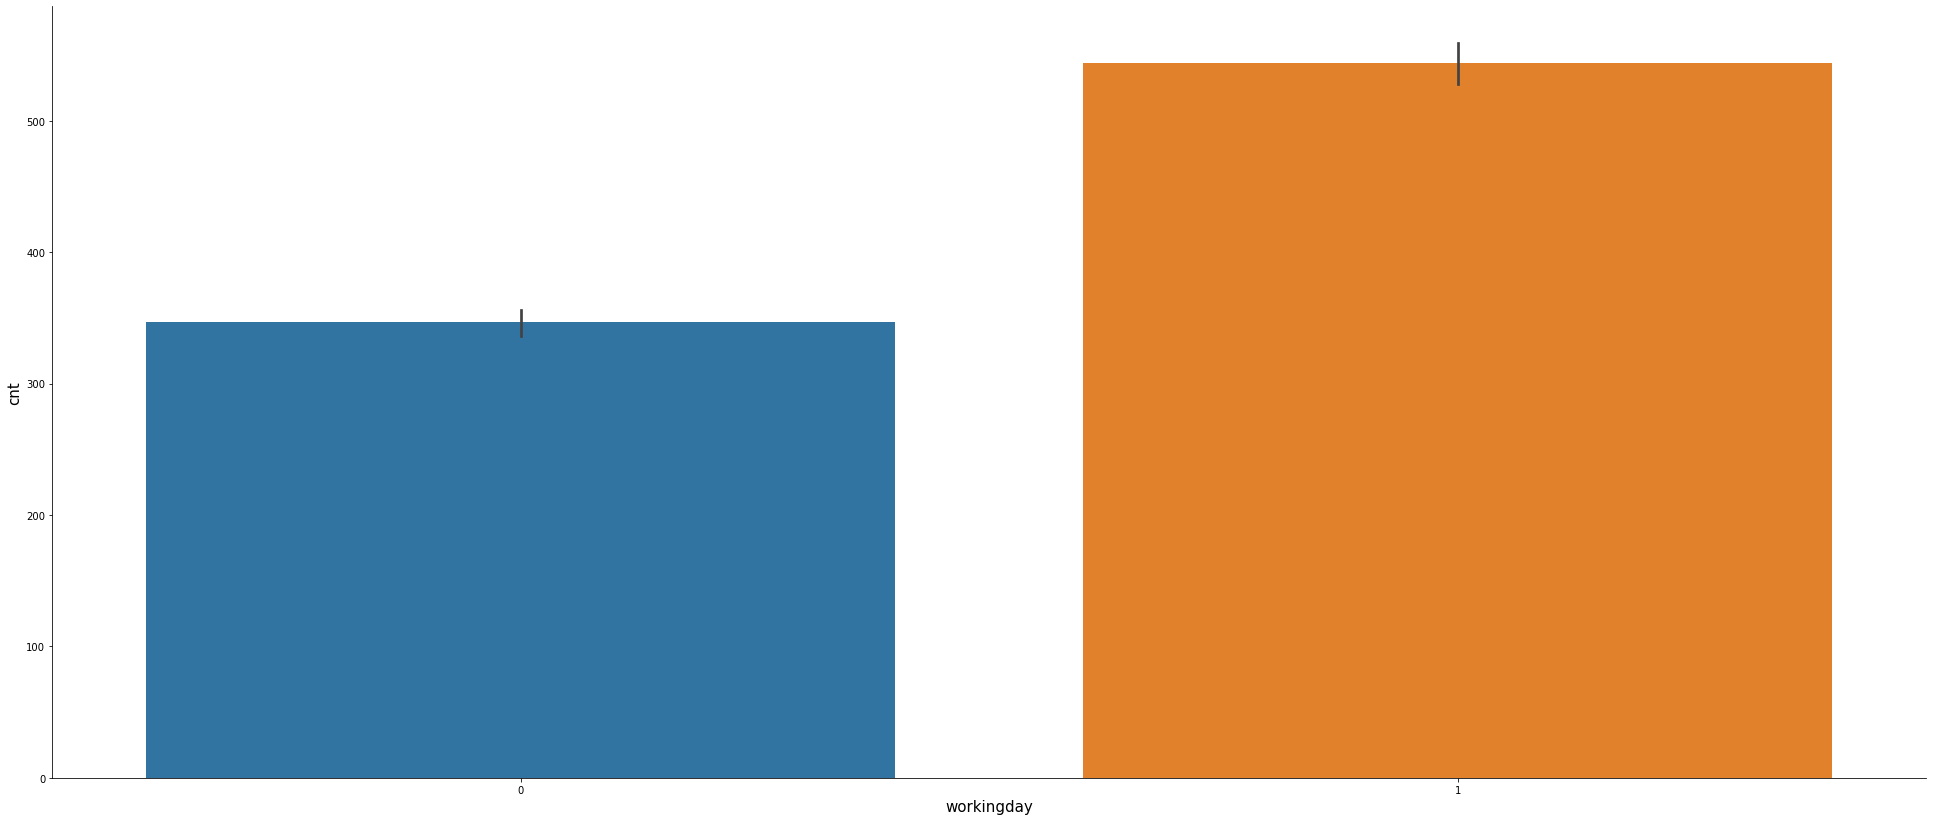

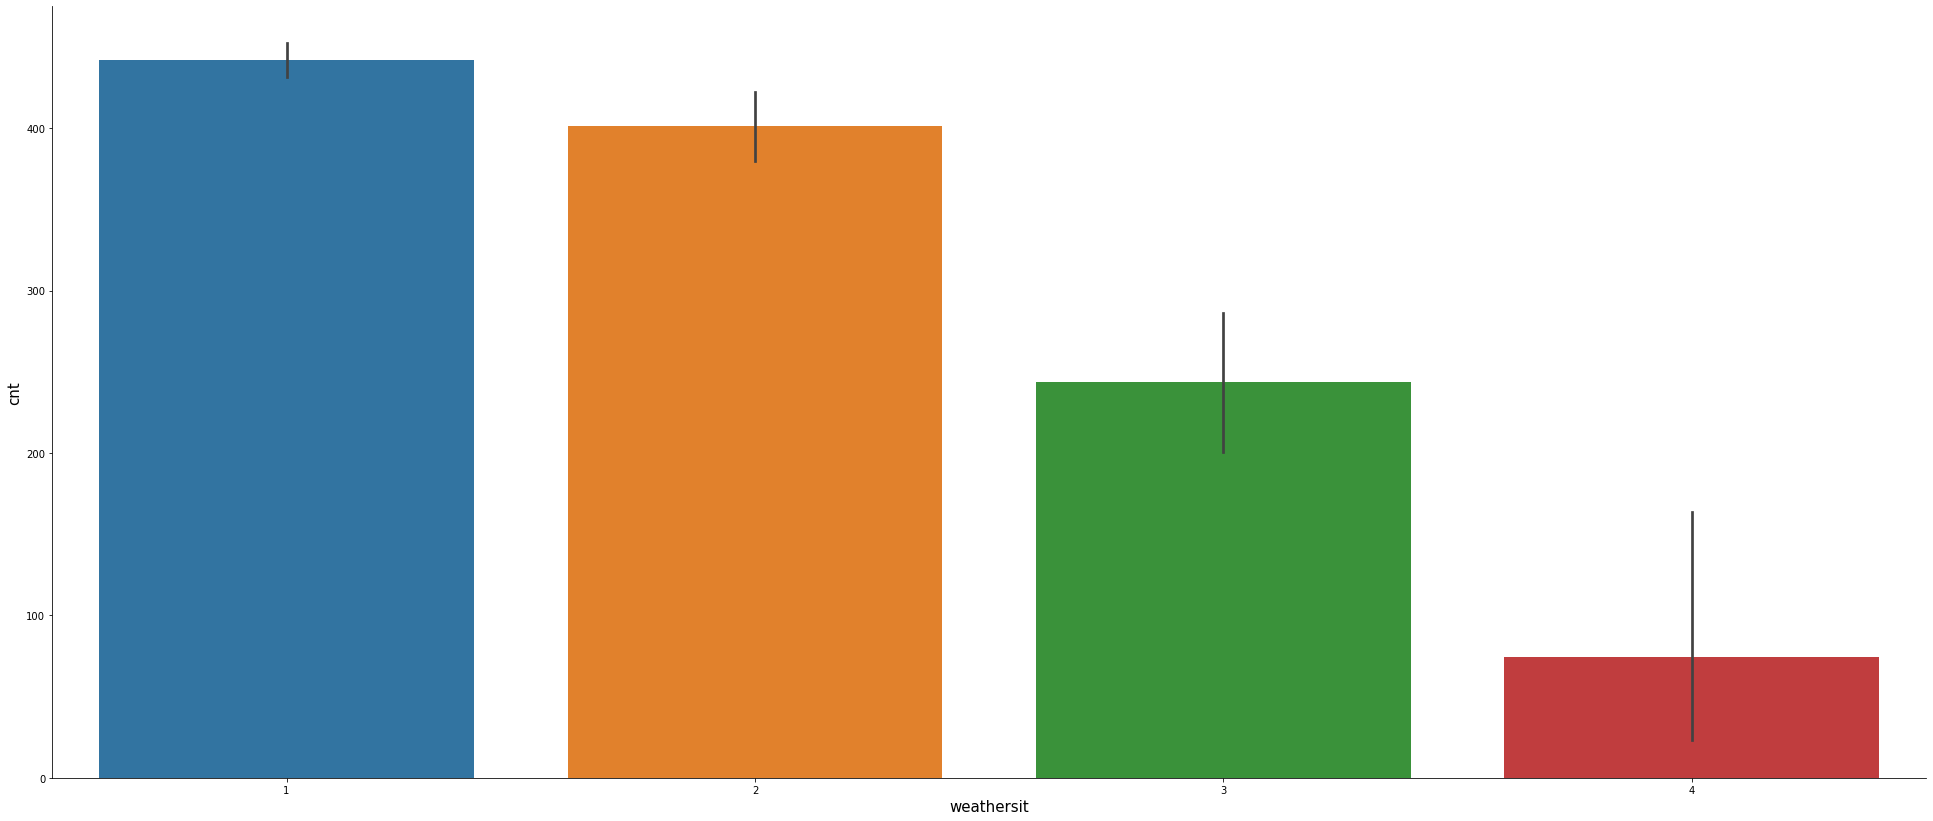

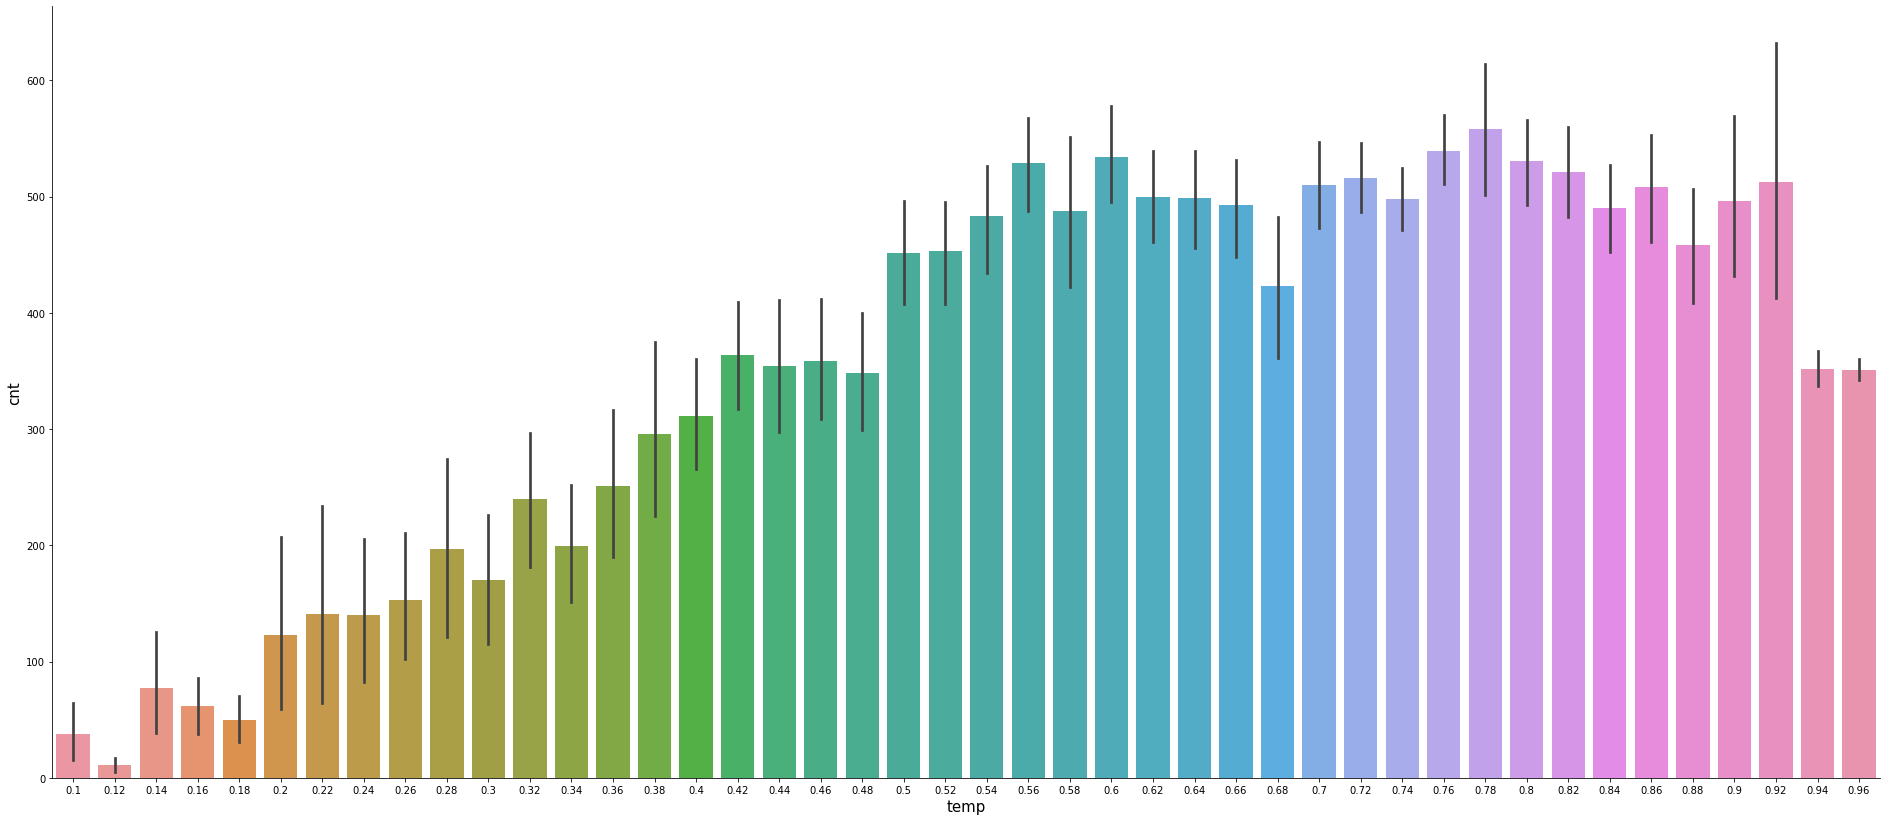

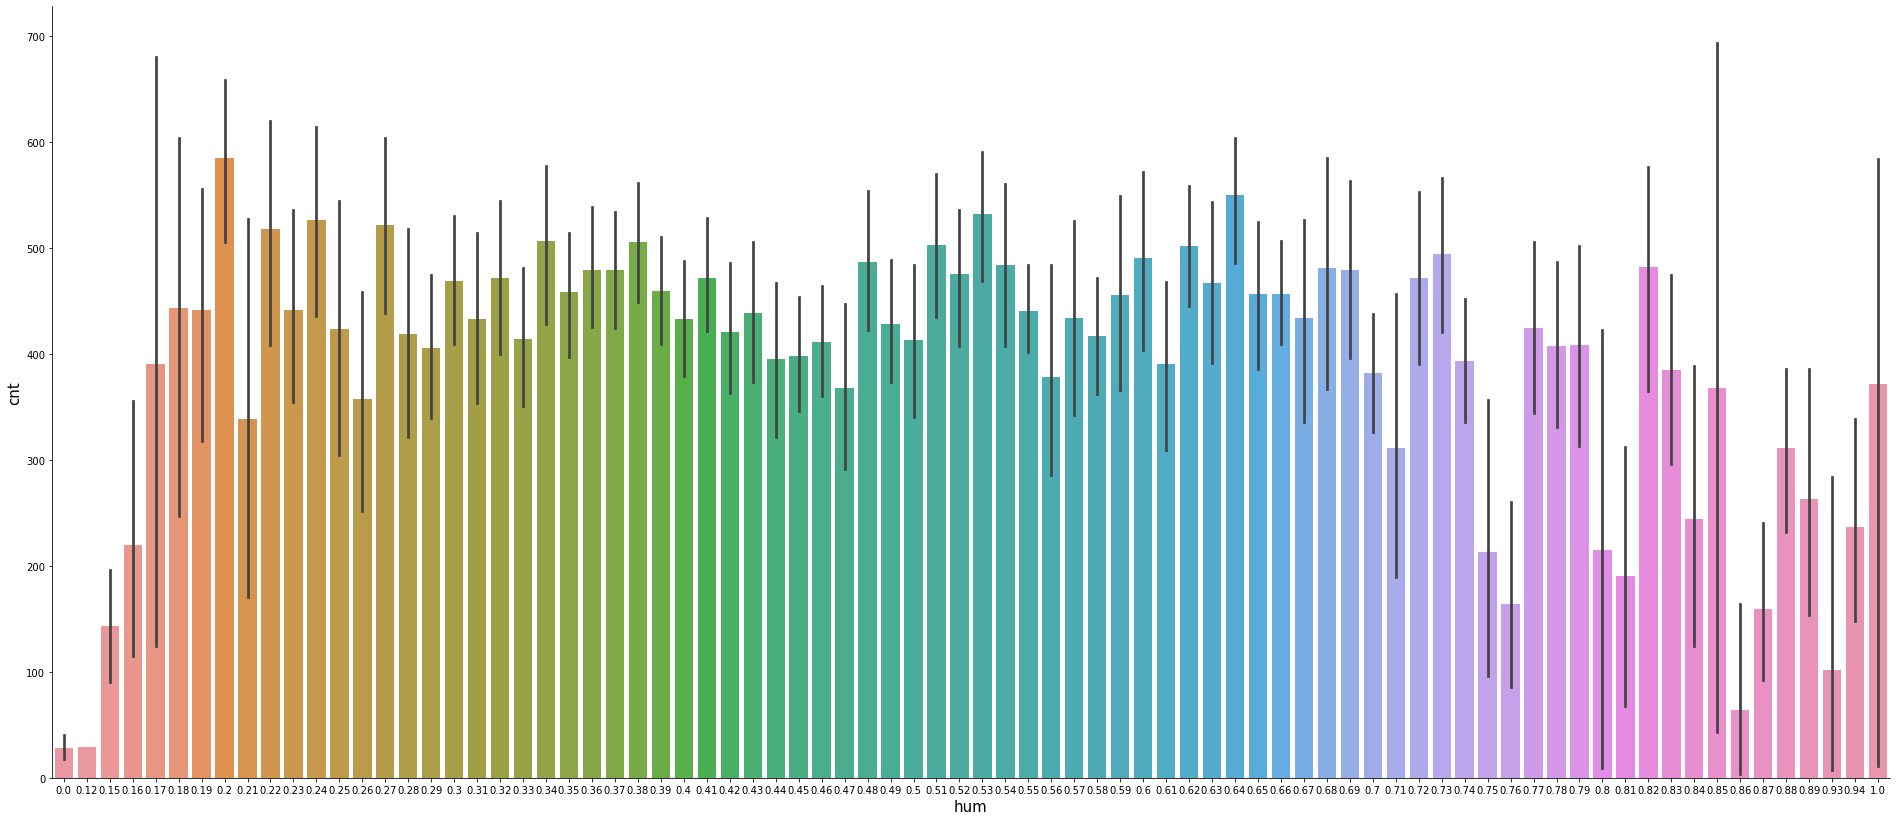

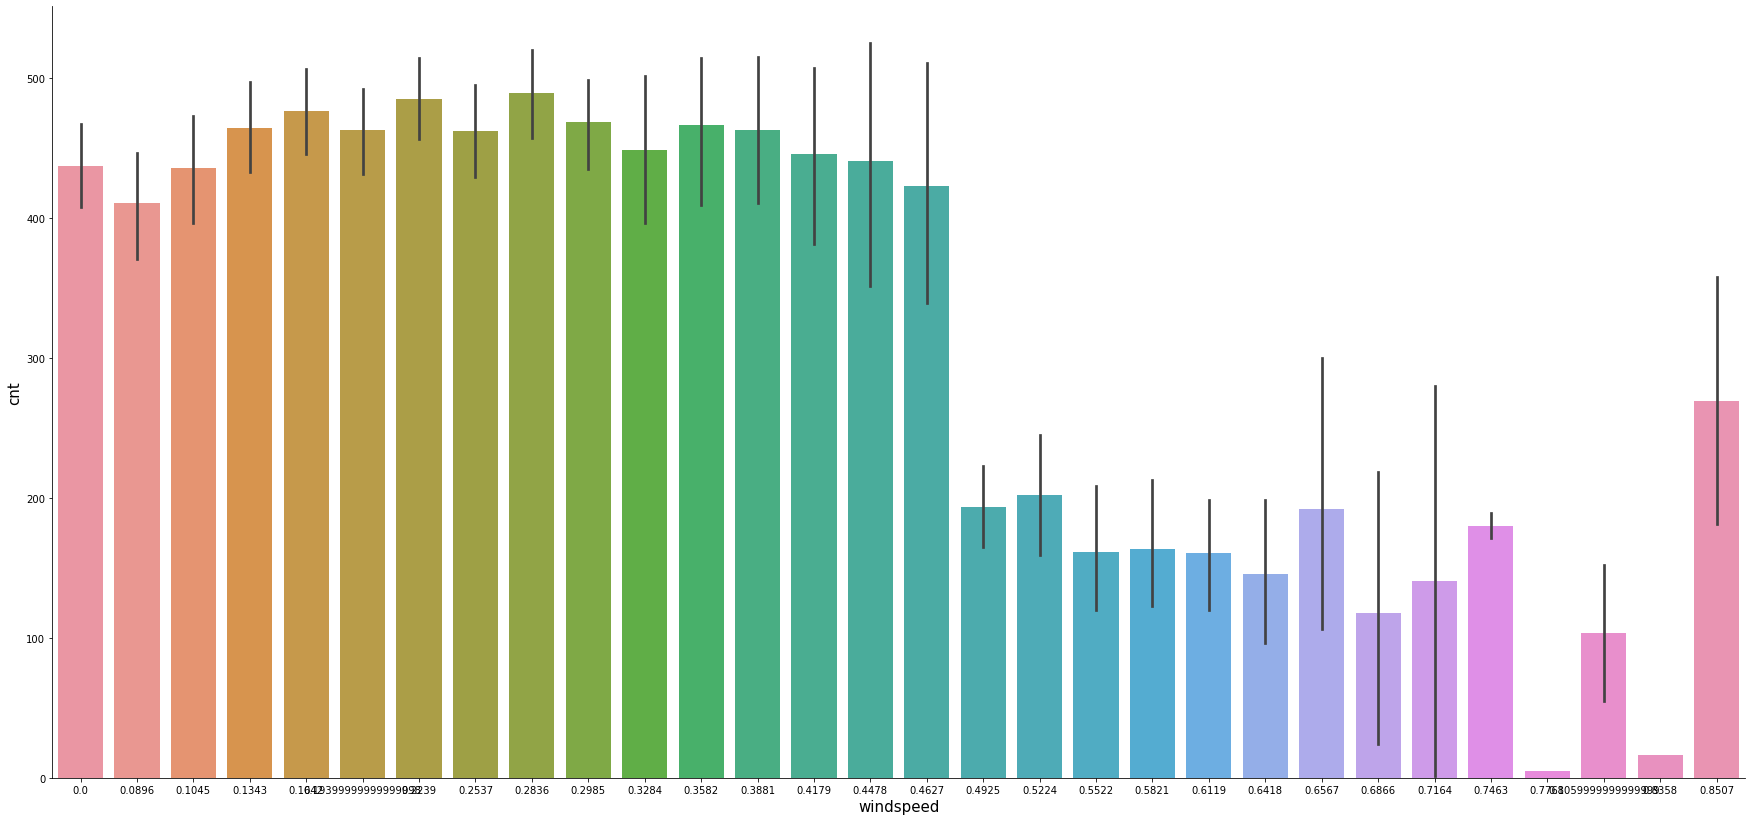

In [236]:
for i in X.columns:
    sns.catplot(
        data=outliers, kind="bar",
        x=i, y="cnt"
    )
    fig=plt.gcf()
    fig.set_size_inches(30,12)
    plt.rcParams["axes.labelsize"] = 15

# Finding outliers and analyzing them.

In [138]:
#count of outliers in different columns

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

atemp            0
casual        1192
cnt            505
dteday           0
holiday        500
hr               0
hum             22
mnth             0
registered     680
season           0
temp             0
weathersit       3
weekday          0
windspeed      342
workingday       0
yr               0
dtype: int64

In [136]:
#count of outliers in different columns
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = df[((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

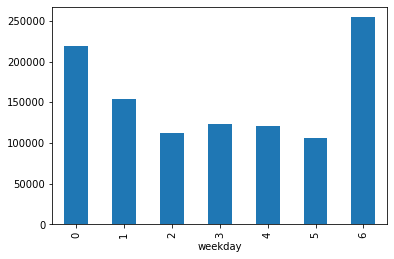

In [145]:
outliers.groupby("weekday").sum()['cnt'].plot(kind='bar')

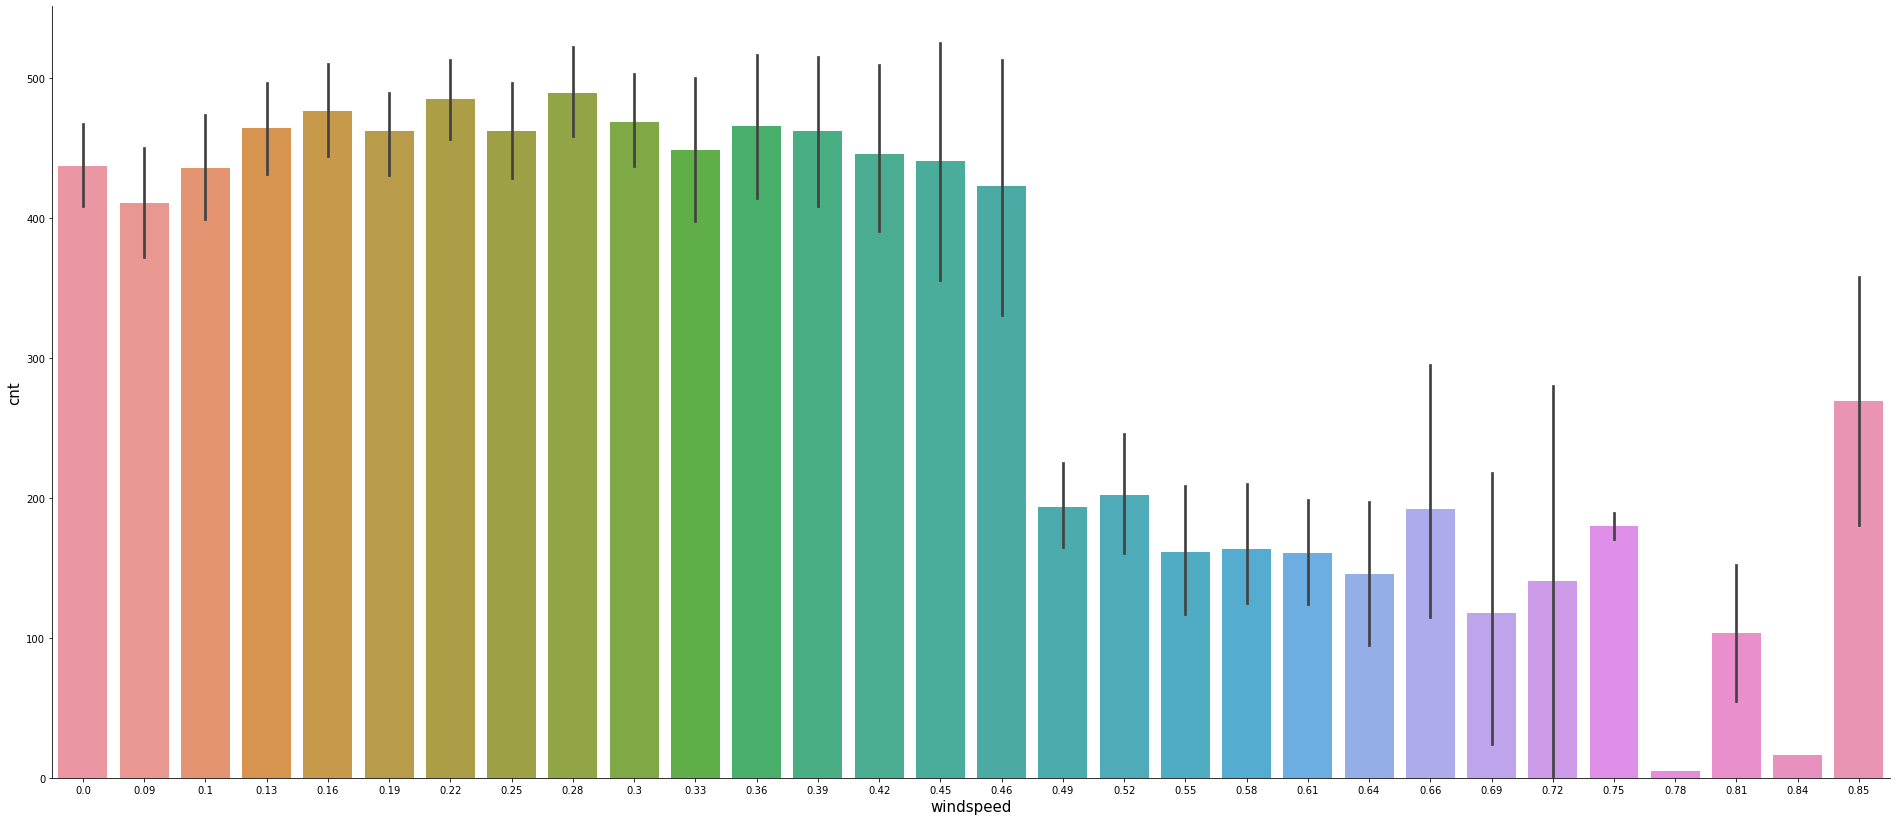

In [297]:
sns.catplot(
    data=np.round(outliers,2), kind="bar",
    x="windspeed", y="cnt"
)
fig=plt.gcf()
fig.set_size_inches(30,12)
# Barplot depicting so called outliers in windspeed. Before 

Here for various columns, they don't seem to be any potential anomalies which disrupt the functioning of model when one is built. All those seem to be true values and they need not be removed.

In [55]:
df.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

# Bargraph to find relationship between 'cnt' column and other columns.

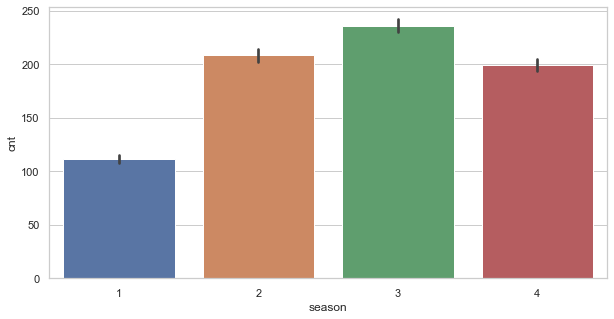

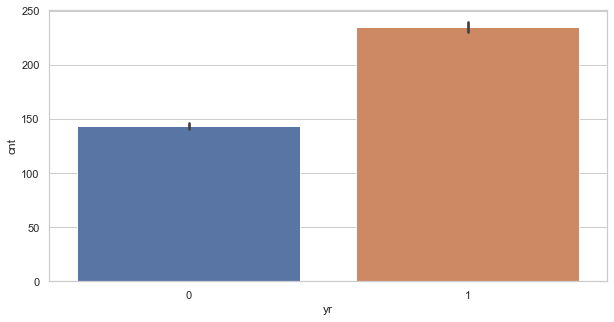

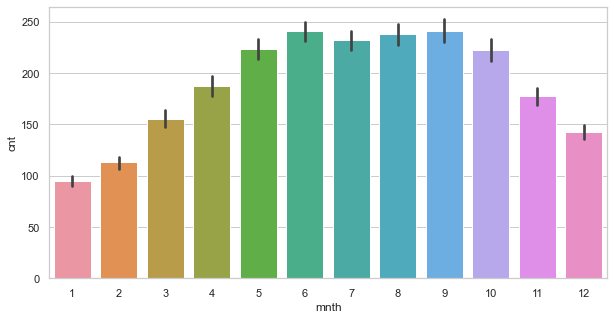

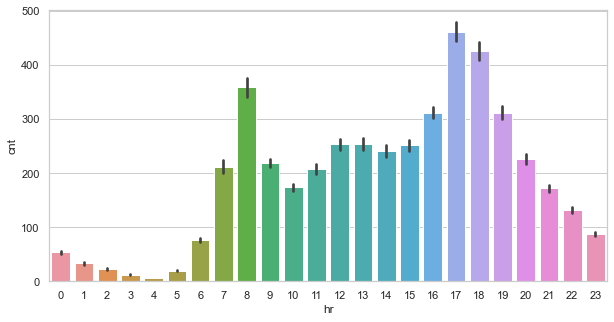

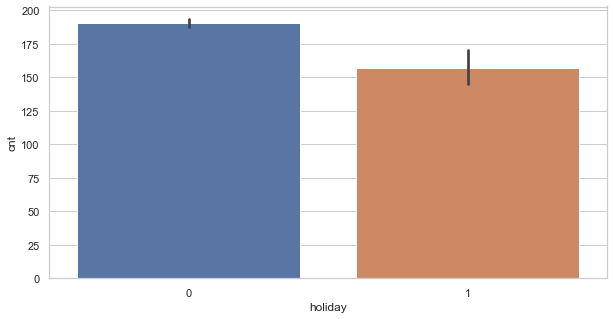

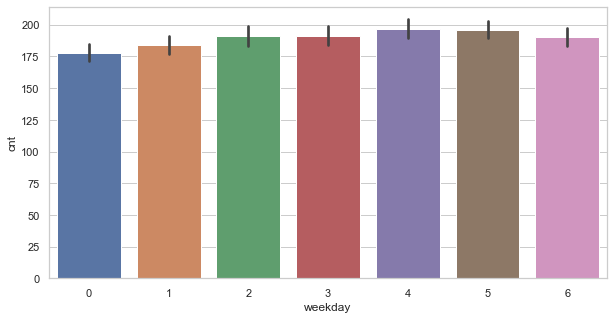

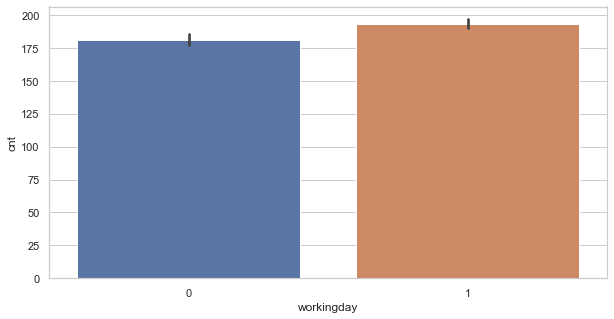

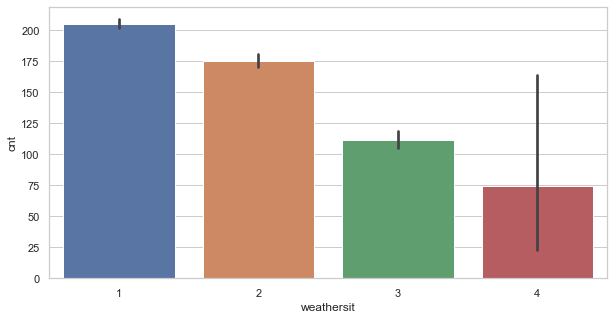

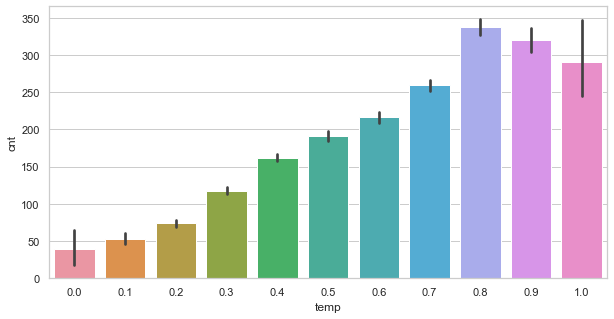

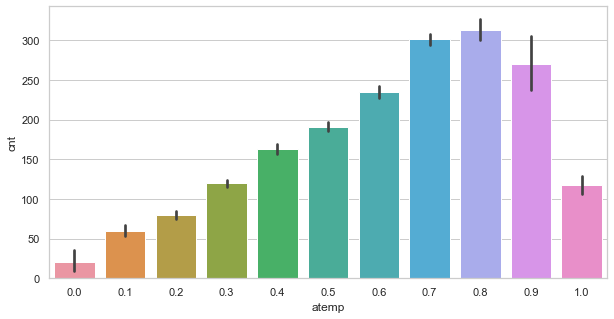

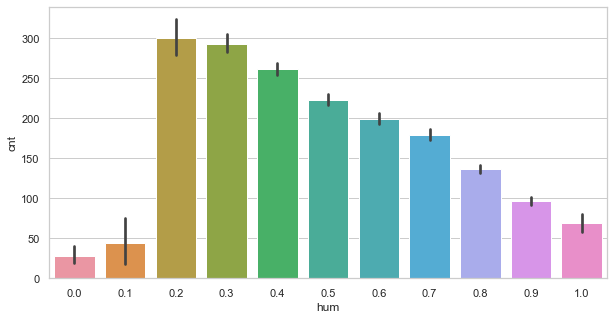

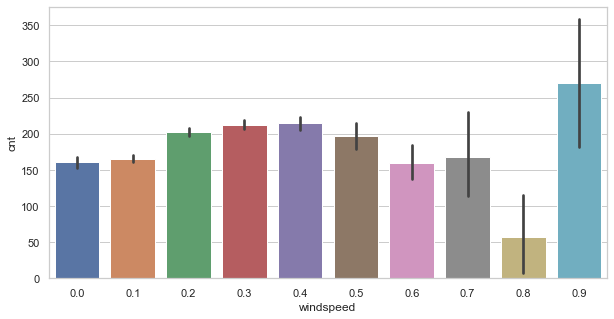

In [11]:
for i in df.columns[:-3]:
    fig, ax = plt.subplots(figsize=(10, 5))
    ax = sns.barplot(x=np.round(df[i],1), y=df.cnt, data=df)
    plt.show()

Inferences from the above cell:
1) Most of the rides are from seasons 2, 3 . People enjoy travelling in season 2 and 3 more.
2) the rides substancially increased from year 0 to year 1.
3) Most of the rides are in summer and fall months i.e., from 5-10.
4) The rides are more in 7AM-9AM hrs and 4PM - 7PM . THis shows sense of environment resposibility people used more to commute to office and schools.
5) People used tavelled more in working days.
6) On workingday people tavelled more.
7) People preferred biking in clear weathers.
8) The counts of bikes are higher in higher temperatures adn low humidities.
9) The windspeed didn't play a prominent role.

# Heatmap without removing the unimportant columns

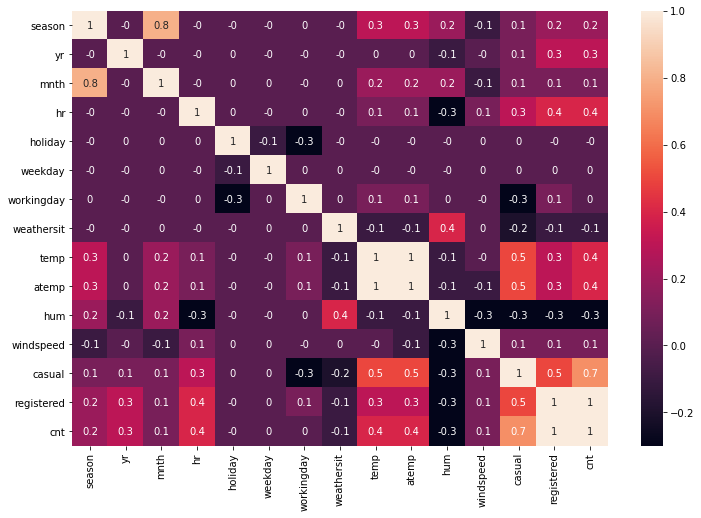

In [340]:
fig, ax = plt.subplots(figsize=(12,8))   
heat=df.corr()
sns.heatmap(np.round(heat,1),annot=True)

-> Sum of Casual and Registered bookings are 'cnt' column
-> temp and atemp are highly correlated , one can be removed
-> month and season are also highly correlated. There would be multi-collinearity as one can be understood from other. Season is removed

In [311]:
df2=df.drop(['atemp','season','casual','registered'],axis=1)

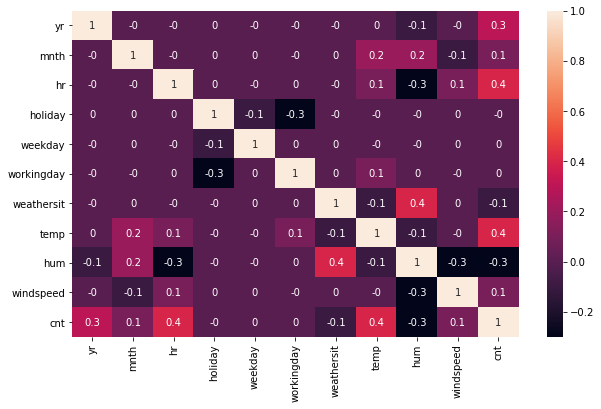

In [312]:
fig, ax = plt.subplots(figsize=(10,6))   
heat=df2.corr()
sns.heatmap(np.round(heat,1),annot=True)

-> In the above heatmap we can see that holiday and working day are inversely proportional with each other. We need to find more information to know if we can remove either of the columns.

# Correlation matrix for holiday , weekday and working day columns to find multicollinearity

In [161]:
q=df[[ 'holiday', 'weekday', 'workingday']]
 
q.corr()


,holiday,weekday,workingday
holiday,1.000000,-0.102088,-0.252471
weekday,-0.102088,1.000000,0.035955
workingday,-0.252471,0.035955,1.000000


In [363]:
pd.crosstab(df.holiday, df.workingday)

workingday,0,1
holiday,,
0,5014,11865
1,500,0


In [364]:
pd.crosstab(df.holiday, df.weekday)

weekday,0,1,2,3,4,5,6
holiday,,,,,,,
0,2502,2122,2430,2451,2423,2439,2512
1,0,357,23,24,48,48,0


In [365]:
pd.crosstab(df.workingday, df.weekday)

weekday,0,1,2,3,4,5,6
workingday,,,,,,,
0,2502,357,23,24,48,48,2512
1,0,2122,2430,2451,2423,2439,0


In [323]:
df2[(df2['holiday']==0) & (df2['workingday']==1)]

,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
instant,,,,,,,,,,,
48,0,1,0,0,1,1,1,0.22,0.44,0.3582,5
49,0,1,1,0,1,1,1,0.20,0.44,0.4179,2
50,0,1,4,0,1,1,1,0.16,0.47,0.3881,1
51,0,1,5,0,1,1,1,0.16,0.47,0.2836,3
52,0,1,6,0,1,1,1,0.14,0.50,0.3881,30
...,...,...,...,...,...,...,...,...,...,...,...
17375,1,12,19,0,1,1,2,0.26,0.60,0.1642,119
17376,1,12,20,0,1,1,2,0.26,0.60,0.1642,89
17377,1,12,21,0,1,1,1,0.26,0.60,0.1642,90


In [324]:
df2[(df2['holiday']==1) & (df2['workingday']==1)]

,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
instant,,,,,,,,,,,


In [325]:
df2[(df2['holiday']==1) & (df2['workingday']==0)]

,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
instant,,,,,,,,,,,
373,0,1,0,1,1,0,2,0.20,0.47,0.2239,17
374,0,1,1,1,1,0,2,0.20,0.44,0.1940,16
375,0,1,2,1,1,0,2,0.18,0.43,0.2537,8
376,0,1,3,1,1,0,2,0.18,0.43,0.1940,2
377,0,1,4,1,1,0,2,0.18,0.43,0.1343,3
...,...,...,...,...,...,...,...,...,...,...,...
17231,1,12,19,1,2,0,2,0.32,0.66,0.2239,36
17232,1,12,20,1,2,0,2,0.32,0.66,0.2836,40
17233,1,12,21,1,2,0,2,0.30,0.65,0.1940,34


In [326]:
df2[(df2['holiday']==0) & (df2['workingday']==0)]

,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
instant,,,,,,,,,,,
1,0,1,0,0,6,0,1,0.24,0.81,0.0000,16
2,0,1,1,0,6,0,1,0.22,0.80,0.0000,40
3,0,1,2,0,6,0,1,0.22,0.80,0.0000,32
4,0,1,3,0,6,0,1,0.24,0.75,0.0000,13
5,0,1,4,0,6,0,1,0.24,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...
17351,1,12,19,0,0,0,1,0.34,0.61,0.0000,102
17352,1,12,20,0,0,0,1,0.22,0.47,0.3284,72
17353,1,12,21,0,0,0,1,0.20,0.51,0.1642,47


In [337]:
df[df['holiday']==1]

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
373,1,0,1,0,1,1,0,2,0.20,0.1970,0.47,0.2239,1,16,17
374,1,0,1,1,1,1,0,2,0.20,0.1970,0.44,0.1940,1,15,16
375,1,0,1,2,1,1,0,2,0.18,0.1667,0.43,0.2537,0,8,8
376,1,0,1,3,1,1,0,2,0.18,0.1818,0.43,0.1940,0,2,2
377,1,0,1,4,1,1,0,2,0.18,0.1970,0.43,0.1343,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17231,1,1,12,19,1,2,0,2,0.32,0.3030,0.66,0.2239,16,20,36
17232,1,1,12,20,1,2,0,2,0.32,0.3030,0.66,0.2836,11,29,40
17233,1,1,12,21,1,2,0,2,0.30,0.2879,0.65,0.1940,8,26,34


In [338]:
df[df['holiday']==0]

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17376,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17377,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90


In [322]:
df[df['holiday']==1]['registered'].hist()df2[(df2['holiday']==0) & (df2['workingday']==0)]['weekday'].value_counts()

6    2512
0    2502
Name: weekday, dtype: int64

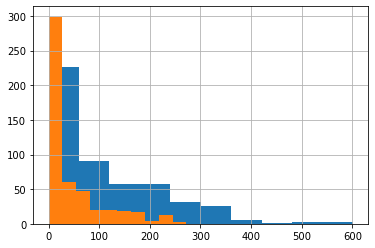

In [336]:
df[(df['holiday']==1) & (df['workingday']==0)]['registered'].hist()

df[(df['holiday']==1) & (df['workingday']==0)]['casual'].hist()

plt.show()

In [ ]:
df[df['holiday']==1]['registered'].hist()

# There was no common relationship found between columns of holiday , weekday and workingday. None of these columns can be dropped.

In [307]:
df2.corr()['cnt']

yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [108]:
df.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [357]:
X=df[['yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday','weathersit', 'temp', 'hum', 'windspeed']]
y=df.cnt

In [110]:
X.shape

(17379, 12)

In [360]:
X.columns

Index(['yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'hum', 'windspeed'],
      dtype='object')

# Model building with Linear regression and polynoial regression.

In [7]:
from sklearn.preprocessing import PolynomialFeatures 

In [372]:
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.25, random_state=5)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
print('r2:',r2_score(y_test,y_pred_lr)*100)
print('mse',metrics.mean_squared_error(y_test, y_pred_lr))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))

r2: 37.71666638194813
mse 20736.97661612449
rmse: 144.00339098828366


In [371]:
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.25, random_state=5)
i=2
poly_reg = PolynomialFeatures(degree=i)
X_poly = poly_reg.fit_transform(X_train)
X_test1 = poly_reg.fit_transform(X_test)
prm = LinearRegression()
prm.fit(X_poly,y_train)
y_pred_prm = prm.predict(X_test1)
print(i,':','r2:',r2_score(y_test,y_pred_prm)*100)
print(i,':','mse',metrics.mean_squared_error(y_test, y_pred_prm))
print(i,':','rmse:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_prm)))

2 : r2: 54.09147681995139
2 : mse 15285.051656091086
2 : rmse: 123.63272890335749


In [374]:
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.25, random_state=5)
i=3
poly_reg = PolynomialFeatures(degree=i)
X_poly = poly_reg.fit_transform(X_train)
X_test1 = poly_reg.fit_transform(X_test)
prm = LinearRegression()
prm.fit(X_poly,y_train)
y_pred_prm = prm.predict(X_test1)
print(i,':','r2:',r2_score(y_test,y_pred_prm)*100)
print(i,':','mse',metrics.mean_squared_error(y_test, y_pred_prm))
print(i,':','rmse:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_prm)))

3 : r2: 62.88602272055582
3 : mse 12356.94421391959
3 : rmse: 111.16179295926992


In [375]:
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.25, random_state=5)
i=4
poly_reg = PolynomialFeatures(degree=i)
X_poly = poly_reg.fit_transform(X_train)
X_test1 = poly_reg.fit_transform(X_test)
prm = LinearRegression()
prm.fit(X_poly,y_train)
y_pred_prm = prm.predict(X_test1)
print(i,':','r2:',r2_score(y_test,y_pred_prm)*100)
print(i,':','mse',metrics.mean_squared_error(y_test, y_pred_prm))
print(i,':','rmse:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_prm)))

4 : r2: 63.8633678356298
4 : mse 12031.541226959072
4 : rmse: 109.68838237005355


# Using standard scaler initially to scale the X dataframe.

In [376]:
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.25, random_state=5)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# transform data
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.fit_transform(X_test)


i=2
poly_reg = PolynomialFeatures(degree=i)
X_train1 = poly_reg.fit_transform(X_train1)
X_test1 = poly_reg.fit_transform(X_test1)



prm = LinearRegression()



prm.fit(X_train1,y_train)
y_pred_prm = prm.predict(X_test1)

print(i,':','r2:',r2_score(y_test,y_pred_prm)*100)
print(i,':','mse',metrics.mean_squared_error(y_test, y_pred_prm))
print(i,':','rmse:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_prm)))


2 : r2: -2.4160176143369926e+22
2 : mse 8.044030057846826e+24
2 : rmse: 2836199932629.367


The standard scaler prodcued negative r2 values.. so further processes are continued with minmax scaler.

# Polynomial Regression with MinMaxScaler

In [380]:
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.25, random_state=5)



from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# transform data
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.fit_transform(X_test)


i=1
poly_reg = PolynomialFeatures(degree=i)
X_train1 = poly_reg.fit_transform(X_train1)
X_test1 = poly_reg.fit_transform(X_test1)



prm = LinearRegression()



prm.fit(X_train1,y_train)
y_pred_prm = prm.predict(X_test1)
print(i,':','r2:',r2_score(y_test,y_pred_prm)*100)
print(i,':','mse',metrics.mean_squared_error(y_test, y_pred_prm))
print(i,':','rmse:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_prm)))

1 : r2: 37.685741553929034
1 : mse 20747.27290886024
1 : rmse: 144.03913672630867


In [381]:
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.15, random_state=5)



from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# transform data
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.fit_transform(X_test)


i=2
poly_reg = PolynomialFeatures(degree=i)
X_train1 = poly_reg.fit_transform(X_train1)
X_test1 = poly_reg.fit_transform(X_test1)



prm = LinearRegression()



prm.fit(X_train1,y_train)
y_pred_prm = prm.predict(X_test1)
print(i,':','r2:',r2_score(y_test,y_pred_prm)*100)
print(i,':','mse',metrics.mean_squared_error(y_test, y_pred_prm))
print(i,':','rmse:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_prm)))

2 : r2: 50.902508470729636
2 : mse 16561.990850604478
2 : rmse: 128.6933986286961


In [383]:
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.25, random_state=5)



from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# transform data
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.fit_transform(X_test)


i=3
poly_reg = PolynomialFeatures(degree=i)
X_train1 = poly_reg.fit_transform(X_train1)
X_test1 = poly_reg.fit_transform(X_test1)



prm = LinearRegression()



prm.fit(X_train1,y_train)
y_pred_prm = prm.predict(X_test1)
print(i,':','r2:',r2_score(y_test,y_pred_prm)*100)
print(i,':','mse',metrics.mean_squared_error(y_test, y_pred_prm))
print(i,':','rmse:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_prm)))

3 : r2: 62.59044871632615
3 : mse 12455.354348027577
3 : rmse: 111.6035588501889


In [384]:
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.25, random_state=5)
i=4
poly_reg = PolynomialFeatures(degree=i)
X_poly = poly_reg.fit_transform(X_train)
X_test1 = poly_reg.fit_transform(X_test)
prm = LinearRegression()
prm.fit(X_poly,y_train)
y_pred_prm = prm.predict(X_test1)
print(i,':','r2:',r2_score(y_test,y_pred_prm)*100)
print(i,':','mse',metrics.mean_squared_error(y_test, y_pred_prm))
print(i,':','rmse:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_prm)))

4 : r2: 63.8633678356298
4 : mse 12031.541226959072
4 : rmse: 109.68838237005355


# After finding the baseline scores .. finding optimum R2, RMSE and MSE using other ensemble methods.

In [458]:
y=df['cnt']
X=df[['yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday','weathersit', 'temp', 'hum', 'windspeed']]

X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.25, random_state=5)
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','KNeighborsRegressor']
rmse=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    test_pred=clf.predict(X_test)
    rmse.append(np.sqrt(mean_squared_error(test_pred,y_test)))
    print('Modelling Algo',model,'RMSE',rmse)
d={'Modelling Algo':model_names,'RMSE':rmse}   
d

Modelling Algo 0 RMSE [45.20795846352091]
Modelling Algo 1 RMSE [45.20795846352091, 103.79771416720071]
Modelling Algo 2 RMSE [45.20795846352091, 103.79771416720071, 47.306351220742314]
Modelling Algo 3 RMSE [45.20795846352091, 103.79771416720071, 47.306351220742314, 56.4275850895054]


{'Modelling Algo': ['RandomForestRegressor', 'AdaBoostRegressor', 'BaggingRegressor', 'KNeighborsRegressor'], 'RMSE': [45.20795846352091, 103.79771416720071, 47.306351220742314, 56.4275850895054]}

# It was found that random forest regressor gave least RMSE values .So, Random forests will be considered for further hyper parameter tuning.

In [393]:
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.25, random_state=5)

rgr = RandomForestRegressor()

rgr.fit(X_train, y_train)
y_pred_rf = rgr.predict(X_test)
y_pred_rf_train =rf.predict(X_train)


print('r2:',r2_score(y_test,y_pred_rf)*100)
print('mse',metrics.mean_squared_error(y_test, y_pred_rf))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))



r2: 93.78358351940696
mse 2069.729985627906
rmse: 45.494285197460854


In [394]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
cv_result = cross_val_score(rgr, X_train,y_train,cv=10)
np.mean(cv_result)

0.9362688386997515

Text(0.5, 0, 'Feature Importance Score')

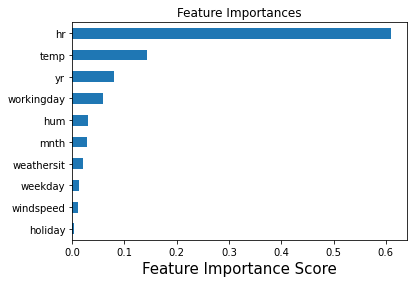

In [397]:
feature_imp = pd.Series(rgr.feature_importances_, X.columns).sort_values()
feature_imp.plot(kind='barh', title='Feature Importances')
plt.xlabel('Feature Importance Score')

In [392]:
y=df['cnt']
X=df[['yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday','weathersit', 'temp', 'hum', 'windspeed']]

X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.25, random_state=5)



from sklearn.ensemble import RandomForestRegressor 
  

rf = RandomForestRegressor(n_estimators = 1000, random_state = 0) 

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

y_pred_rf_train =rf.predict(X_train)


print('r2:',r2_score(y_test,y_pred_rf)*100)
print('mse',metrics.mean_squared_error(y_test, y_pred_rf))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))


r2: 93.93431843325597
mse 2019.5434236354329
rmse: 44.939330476047736


In [391]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
cv_result = cross_val_score(rf, X_train,y_train,cv=10)
np.mean(cv_result)

0.9366539470652551

Text(0.5, 0, 'Feature Importance Score')

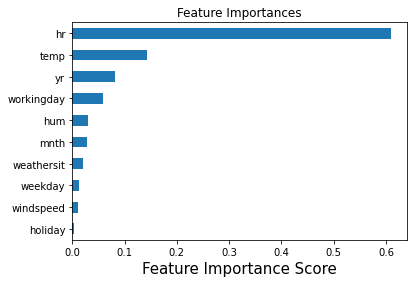

In [398]:
feature_imp = pd.Series(rf.feature_importances_, X.columns).sort_values()
feature_imp.plot(kind='barh', title='Feature Importances')
plt.xlabel('Feature Importance Score')

In [418]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [422]:
y=df['cnt']
X=df[['yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday','weathersit', 'temp', 'hum', 'windspeed']]

X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.25, random_state=5)

import xgboost as xgb
from xgboost.sklearn import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print('r2:',r2_score(y_test,y_pred_xgb)*100)
print('mse',':',metrics.mean_squared_error(y_test, y_pred_xgb))
print('rmse',':',np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb)))


r2: 94.45092520333588
mse : 1847.541350391014
rmse : 42.9830356116342


In [406]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
cv_result = cross_val_score(xgb, X_train,y_train,cv=10)
np.mean(cv_result)

0.9410693971507806

Text(0.5, 0, 'Feature Importance Score')

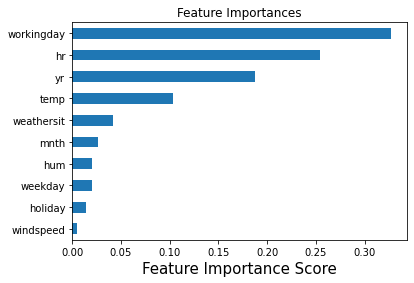

In [410]:
feature_imp = pd.Series(xgb.feature_importances_, X.columns).sort_values()
feature_imp.plot(kind='barh', title='Feature Importances')
plt.xlabel('Feature Importance Score')

In [411]:
for i in y_pred_xgb :
    if i <0 :        
        print(i)

-53.281433
-3.2509065
-9.13508
-1.5205193
-5.173932
-0.7514674
-1.6262445
-5.11973
-0.4832927
-1.8940891
-4.5164666
-0.31010595
-5.05153
-3.9578505
-0.58533597
-0.48890132
-4.8451324
-4.239762
-0.78188616
-1.3674788
-2.182011
-4.0886316
-11.248827
-3.9054236
-3.9995365
-3.6998765
-32.852264
-6.558085
-5.695063
-7.3291063
-8.15382
-6.2326655
-16.734306
-18.552568
-0.19315526
-3.325248
-7.566047
-0.4658056
-1.5979924
-7.632663
-1.8537747
-6.3101354
-2.9614255
-13.991581
-13.309688
-0.34989935
-0.7279884
-2.5488245
-10.905083
-6.224757
-26.580975
-22.960112
-3.965758
-51.767277
-3.8926818
-19.992483
-0.37794942
-11.6104965
-2.6941543
-36.161583
-4.056098
-0.8639165
-2.8923151
-18.871586
-12.154708
-2.087808
-6.342407
-55.027767
-27.019615
-3.5631914
-9.497131
-1.9080415
-2.8598762
-12.68469
-3.871637
-3.5417705
-23.742798
-12.593374
-19.104593
-1.2205119
-2.7430198
-2.348159
-5.6833735
-5.144672
-5.0145707
-2.7090657
-1.063297
-10.705838
-0.81495917
-9.32559
-7.146262
-1.0312395
-15.95688

Since , the predicted values are negative, XGboosting cannot be used as a regression model. We will be contnuing with random forest for hyperparameter tuning.

In [448]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}

# Hyper Parameter tuning of Random Forest Regressor.

In [451]:
y=df['cnt']
X=df[['yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday','weathersit', 'temp', 'hum', 'windspeed']]

X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.25, random_state=5)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=True, total= 2.2min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min remaining:    0.0s


[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=True, total= 2.1min
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=True, total= 2.7min
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True, total=  19.8s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True, total=  19.4s
[CV] n_estimators=800, min_s

[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=True, total=  19.0s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=True, total=  48.6s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=True, total=  46.6s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=True, total=  46.4s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=30, bootstrap=True 
[CV]  n_estimators=1000, mi

[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=False, total=  35.6s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=False, total=  34.7s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=False, total=  31.6s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True, total=  29.8s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimat

[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=True, total=  13.6s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=True, total=  13.1s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=True, total=  19.2s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=True, total=  20.1s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=1800, min_sa

[CV]  n_estimators=1400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=  12.7s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False, total=   2.5s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False, total=   2.5s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False, total=   2.5s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=80

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 83.3min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=50,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   verbose=2)

In [452]:
clf_randomgrid.best_params_

{'n_estimators': 944, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10}

In [459]:

y=df['cnt']
X=df[['yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday','weathersit', 'temp', 'hum', 'windspeed']]

X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.30, random_state=100)

rgr = RandomForestRegressor(n_estimators=944, min_samples_split=5, min_samples_leaf=1, max_features='auto', max_depth=10)

rgr.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=944)

In [454]:
y_pred_random = rgr.predict(X_test)

In [455]:
print('r2:',r2_score(y_test,y_pred_random)*100)
print('mse',metrics.mean_squared_error(y_test, y_pred_random))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_random)))

r2: 91.89920240109589
mse 2653.530803293973
rmse: 51.512433482548396


In [460]:
#Cross Validation Score
cv_result = cross_val_score(rgr, X_train , y_train ,cv=5)
np.mean(cv_result)

0.9124665169458865

# Predicting the rides for Casual Column

In [461]:

y=df['casual']
X=df[['yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday','weathersit', 'temp', 'hum', 'windspeed']]

X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.25, random_state=100)

rgr = RandomForestRegressor(n_estimators=944, min_samples_split=5, min_samples_leaf=1, max_features='auto', max_depth=10)

rgr.fit(X_train, y_train)
y_pred_random = rgr.predict(X_test)
print('r2:',r2_score(y_test,y_pred_random)*100)
print('mse',metrics.mean_squared_error(y_test, y_pred_random))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_random)))

r2: 87.7330716420942
mse 271.74849778460487
rmse: 16.484795958233903


# Predicting the rides for Registered Column

In [456]:

y=df['registered']
X=df[['yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday','weathersit', 'temp', 'hum', 'windspeed']]

X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.25, random_state=100)

rgr = RandomForestRegressor(n_estimators=944, min_samples_split=5, min_samples_leaf=1, max_features='auto', max_depth=10)

rgr.fit(X_train, y_train)
y_pred_random = rgr.predict(X_test)
print('r2:',r2_score(y_test,y_pred_random)*100)
print('mse',metrics.mean_squared_error(y_test, y_pred_random))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_random)))

r2: 92.74111402923593
mse 1674.0740953925817
rmse: 40.915450570567856
